In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
# Leer el archivo CSV
file_path = 'C:/Users/carlo/comprar_alquilar.csv'
data = pd.read_csv(file_path)

In [88]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(data.head())

Primeras filas del DataFrame:
   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1  


In [89]:
# Separar características y variable objetivo
X = data.drop('comprar', axis=1)
y = data['comprar']

In [90]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# Aplicar PCA con el número máximo de componentes
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

In [92]:
# Porcentaje de varianza explicada por cada componente principal
expl_var = pca.explained_variance_ratio_
print("\nPorcentaje de varianza explicada por cada componente:")
print(expl_var)


Porcentaje de varianza explicada por cada componente:
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]


In [93]:
# Porcentaje de varianza explicada acumulada
expl_var_acum = np.cumsum(expl_var)
print("\nPorcentaje de varianza explicada acumulada:")
print(expl_var_acum)


Porcentaje de varianza explicada acumulada:
[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]


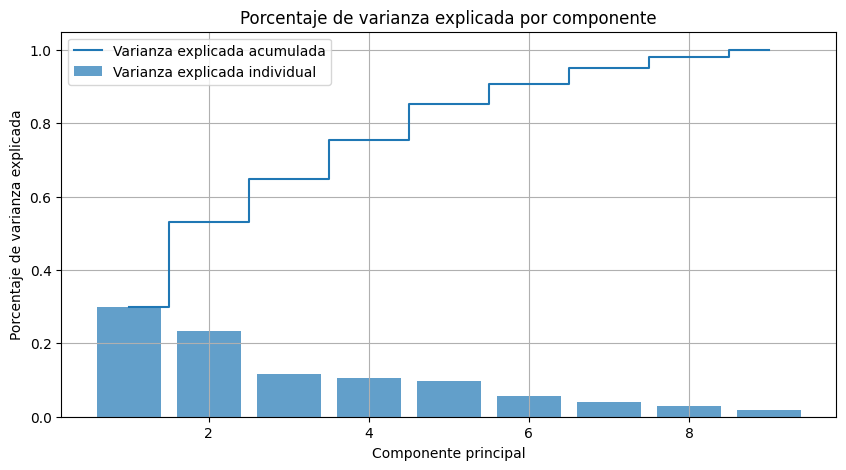

In [94]:
# Gráfico de varianza explicada por componente
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(expl_var) + 1), expl_var, alpha=0.7, align='center',
        label='Varianza explicada individual')
plt.step(range(1, len(expl_var_acum) + 1), expl_var_acum, where='mid',
         label='Varianza explicada acumulada')
plt.xlabel('Componente principal')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Porcentaje de varianza explicada por componente')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [95]:
# Decisión del número de componentes a retener
n_components = np.argmax(expl_var_acum >= 0.95) + 1
print(f"\nNúmero óptimo de componentes seleccionados: {n_components}")


Número óptimo de componentes seleccionados: 7


In [96]:
# Aplicar PCA con el número óptimo de componentes
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

In [97]:
# Crear un DataFrame con los componentes principales finales
df_pca = pd.DataFrame(data=X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca['comprar'] = y

In [98]:
# Visualización de los resultados (si hay solo 2 componentes)
if n_components == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis')
    plt.title('PCA con los componentes seleccionados')
    plt.xlabel('Primer Componente Principal')
    plt.ylabel('Segundo Componente Principal')
    plt.colorbar(label='Comprar')
    plt.show()

In [99]:
# Guardar los datos transformados en un nuevo CSV
output_path = 'datos_reducidos.csv'
df_pca.to_csv(output_path, index=False)
print(f"\nDatos reducidos guardados en: {output_path}")


Datos reducidos guardados en: datos_reducidos.csv
